In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


La forêt d'isolement, ou Isolation Forest, est un algorithme de machine learning non supervisé conçu principalement pour la détection d'anomalies dans des ensembles de données. Son fonctionnement repose sur le principe d'isoler les points de données considérés comme atypiques, c'est-à-dire ceux qui diffèrent significativement de la majorité des autres données.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [ ]:
credit_data = pd.read_csv('/content/drive/MyDrive/dataset_IAC/creditcard.csv', nrows=40000) # https://www.kaggle.com/mlg-ulb/creditcardfraud
scaler = StandardScaler().fit_transform(credit_data.loc[:,credit_data.columns!='Class'])
scaled_data = scaler[0:40000]
df = pd.DataFrame(data=scaled_data)
# Separate features and target variable
X = credit_data.drop(columns=['Class'])
y = credit_data['Class']


In [ ]:
# Determine the fraction of outliers
outlier_fraction = len(credit_data[credit_data['Class']==1])/float(len(credit_data[credit_data['Class']==0]))
# Create and fit the Isolation Forest model
model =  IsolationForest(n_estimators=100, contamination=outlier_fraction, random_state=42)
model.fit(df)


IsolationForest(contamination=0.0026067776218167233, random_state=42)

In [ ]:
# Predict outliers
scores_prediction = model.decision_function(df)
y_pred = model.predict(df)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
# Print the accuracy in separating outliers or anomalies
print("Accuracy in finding anomaly:",accuracy_score(y,y_pred))


Accuracy in finding anomaly: 0.997175


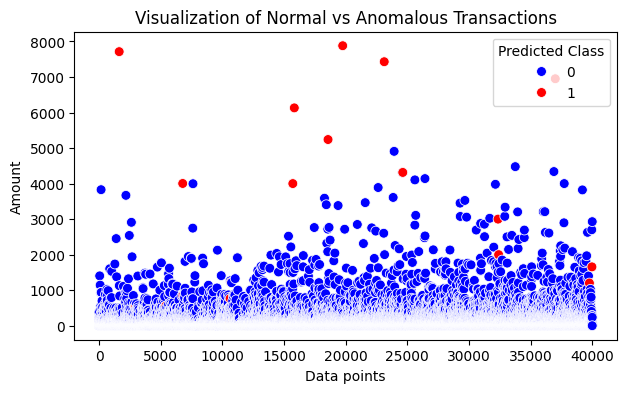

In [ ]:
# Selecting the feature for y-axis
y_feature = credit_data['Amount']    # change the feature name to visualize another

# Adding the predicted labels to the original dataset
credit_data['predicted_class'] = y_pred

# Plotting the graph
plt.figure(figsize=(7, 4))
sns.scatterplot(x=credit_data.index, y=y_feature, hue=credit_data['predicted_class'], palette={0: 'blue', 1: 'red'}, s=50)
plt.title('Visualization of Normal vs Anomalous Transactions')
plt.xlabel('Data points')
plt.ylabel(y_feature.name)
plt.legend(title='Predicted Class', loc='best')
plt.show()
